In [1]:
# Import Librarys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="4th-bullet">

### Import the dataset
    
</a>

In [78]:
train_data = pd.read_csv('train_data.csv')


<a class="anchor" id="4th-bullet">


### Describing the variables that were assigned to me

</a>



### Adding AccientID

In [79]:
AccidentID = range(1, len(train_data) + 1)
train_data.insert(0, 'AccidentID', AccidentID )


Insert a new AccidentID to each row to make easier make some validations in the future


### Remove the rows that are completely empty

In [80]:
# Identificar as linhas que têm valores apenas em 'Assembly Date' e 'Claim Identifier'
# e são nulas nas outras colunas (exceto 'AccidentID').
mask = (train_data['Assembly Date'].notnull() & 
        train_data['Claim Identifier'].notnull() & 
        train_data.drop(columns=['Assembly Date', 'Claim Identifier', 'AccidentID']).isnull().all(axis=1))

# Remover as linhas que têm valores apenas em 'Assembly Date' e 'Claim Identifier'
train_data = train_data[~mask]

# Verificar o número total de linhas após a remoção
print("Total rows after removing AccidentID with values ​​only in 'Assembly Date' and 'Claim Identifier':", train_data.shape[0])


Total rows after removing AccidentID with values ​​only in 'Assembly Date' and 'Claim Identifier': 574026


**_Note_**: You should not use any information from the validation / test dataset to fill the missing values. 
Let's imagine that you have missing values on age and you want to fill those missing values with the median. You should compute the median value of age for the train dataset (suppose is 35) and fill the missing values in train, validation and test set (if available) with the median in the train dataset (35).

In [12]:
train_data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccidentID,574026.0,NaN,NaN,NaN,297087.036347,171284.10124,1.0,148885.25,297264.0,445420.75,593468.0
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574026.0,NaN,NaN,NaN,42.11427,14.256432,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574026,3,N,571412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,574026,897,2020-03-06,1413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574026,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545375.0,NaN,NaN,NaN,491.088321,6092.91812,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,NaN,NaN,NaN,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187245,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Filling the misssing Column with relevant variables


#### Checking for duplicates

In [10]:
train_data.duplicated().sum()
# There are no duplicates to remove

0

#### Check for uniqueness


In [13]:
#Cheching the unique values of my variables:
train_data["Carrier Type"].unique()

array(['1A. PRIVATE', '2A. SIF', '4A. SELF PRIVATE', '3A. SELF PUBLIC',
       'UNKNOWN', '5D. SPECIAL FUND - UNKNOWN',
       '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       '5C. SPECIAL FUND - POI CARRIER WCB MENANDS'], dtype=object)

In [14]:
train_data["Claim Injury Type"].unique()

array(['2. NON-COMP', '4. TEMPORARY', '3. MED ONLY', '5. PPD SCH LOSS',
       '6. PPD NSL', '1. CANCELLED', '8. DEATH', '7. PTD'], dtype=object)

In [15]:
train_data["County of Injury"].unique()

array(['ST. LAWRENCE', 'WYOMING', 'ORANGE', 'DUTCHESS', 'SUFFOLK',
       'ONONDAGA', 'RICHMOND', 'MONROE', 'KINGS', 'NEW YORK', 'QUEENS',
       'WESTCHESTER', 'GREENE', 'NASSAU', 'ALBANY', 'ERIE', 'BRONX',
       'CAYUGA', 'NIAGARA', 'LIVINGSTON', 'WASHINGTON', 'MADISON',
       'WARREN', 'SENECA', 'GENESEE', 'SARATOGA', 'CHAUTAUQUA',
       'COLUMBIA', 'RENSSELAER', 'CATTARAUGUS', 'ROCKLAND', 'SCHUYLER',
       'BROOME', 'ULSTER', 'CLINTON', 'ONEIDA', 'UNKNOWN', 'MONTGOMERY',
       'ONTARIO', 'SCHENECTADY', 'CHEMUNG', 'YATES', 'HERKIMER',
       'ALLEGANY', 'TIOGA', 'FULTON', 'DELAWARE', 'TOMPKINS', 'PUTNAM',
       'OSWEGO', 'LEWIS', 'ESSEX', 'OTSEGO', 'CORTLAND', 'ORLEANS',
       'SULLIVAN', 'CHENANGO', 'FRANKLIN', 'WAYNE', 'JEFFERSON',
       'STEUBEN', 'SCHOHARIE', 'HAMILTON'], dtype=object)

### Identification of outliers


#### First variable: Carrier Type

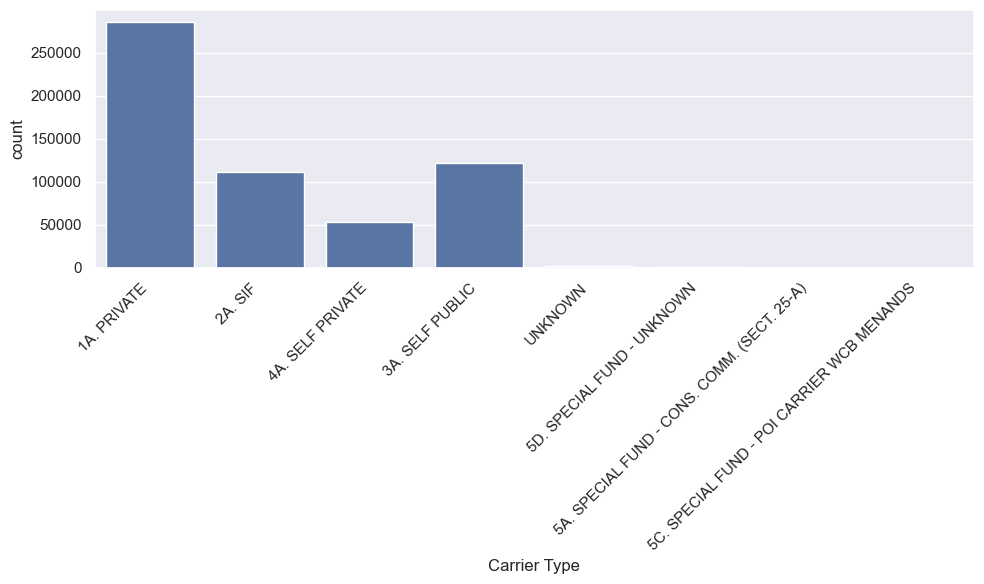

In [16]:
plt.figure(figsize=(10, 6))  # Width = 10, Height = 6
sns.set()  # Resetting Seaborn's formatting defaults

# Creating the countplot
sns.countplot(x=train_data["Carrier Type"])

plt.xticks(rotation=45, ha='right')  # Rotate and align to the right

plt.tight_layout()  # Prevent further overlap
# Display the plot
plt.show()

#we can notice that uknown 5A 5D 5C are not very common
# Type of primary insurance provider responsible for providing workers’ compensation coverage.


In [17]:
# Calculate frequency distribution
freq_dist = train_data['Carrier Type'].value_counts()
print(freq_dist)

# 5C and 5A are extreme outliers to further see whether we cshould retain them or remove them

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64


#### Second Variable: County of Injury

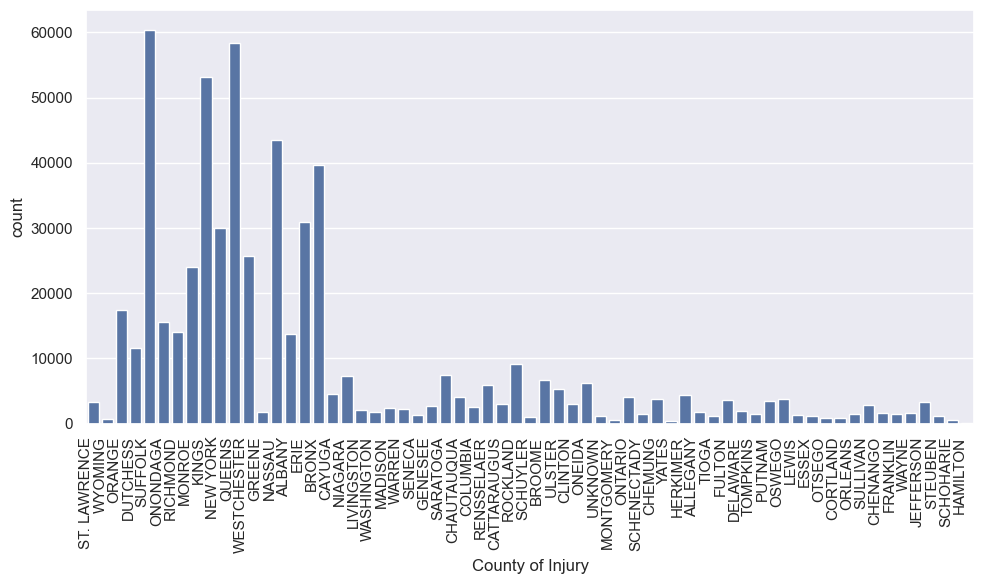

In [18]:
#Name of the New York County where the injury occurre
plt.figure(figsize=(10, 6))  # Width = 10, Height = 6
sns.set()  # Resetting Seaborn's formatting defaults

# Creating the countplot
sns.countplot(x=train_data["County of Injury"])

plt.xticks(rotation=90, ha='right')  # Rotate and align to the right

plt.tight_layout()  # Prevent further overlap
# Display the plot
plt.show()

In [19]:
# Calculate frequency distribution
freq_dist = train_data['County of Injury'].value_counts()
print(freq_dist)

County of Injury
SUFFOLK       60430
QUEENS        58333
KINGS         53207
NASSAU        43580
BRONX         39618
              ...  
WYOMING         760
MONTGOMERY      613
SCHOHARIE       558
YATES           396
HAMILTON        134
Name: count, Length: 63, dtype: int64


Initial Observation
- Filled the missing column since it might be useful for the analysis of my variables
- Changed carrier type variable and claim injury type into numbers
Observations:
- No missing values in my variables
- No duplicates
- Extreme outliers identified in carrier type: 5C and 5A are extreme outliers to further see whether we cshould retain them or remove them
Conclusion:
- No insights can be found in Claim Identifier from data we can see that it is assigned randomly from WCB
-> Maybe it is better to drop it since there's no possible outcome out of it also it is redundunt
- No insights can be found in Carrier name from data we can see that we can know the type of insurance from the next row
-> Maybe it is better to drop it since there's no possible outcome out of it
- The relationship between county of injury and Claim Injury do not provide too much information, we can see if we keep it or we drop it
- The data needs to be further cleaned and we need new features

# Data Preprocessing

## Dealing with missing values

In [84]:
train_data_copy = train_data.copy()

In [26]:
train_data_copy.isna().sum()

AccidentID                                 0
Accident Date                           3689
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    28651
Birth Year                             29078
C-2 Date                               14560
C-3 Date                              386781
Carrier Name                               0
Carrier Type                               0
Claim Identifier                           0
Claim Injury Type                          0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    423228
Gender                                     0
IME-4 Count                           441223
Industry Code                           9958
Industry Code Description               9958
Medical Fe

#### 1- Dropping the empty column


In [27]:
train_data_copy = train_data_copy.drop(columns="OIICS Nature of Injury Description")

#### 2- Dealing with missing values in Age

In [28]:
train_data_copy['Age at Injury'].replace(0, np.nan, inplace=True) 

In [29]:
train_data_copy['Birth Year'].replace(0, np.nan, inplace=True) 

In [30]:
train_data_copy['Accident Date'] = pd.to_datetime(train_data_copy['Accident Date'])

In [31]:
#We have age=0 which doesn't make a sense so I changed it to nan I tried to fill it using bithday and accident day 
#only 93 rows were filled which minimal but these values are true values and not assumptions

In [32]:

# Extract year from each date
train_data_copy['accident_year'] = train_data_copy['Accident Date'].dt.year


# Update age_at_injury where age is 0 and birth year is different from 0
train_data_copy.loc[
    (train_data_copy['Age at Injury'].isna()) & (train_data_copy['Birth Year'].notna()) & (train_data_copy['Accident Date'].notna()),
    'Age at Injury'
] = train_data_copy.apply(
   lambda row: (row['accident_year'] - row['Birth Year']),
    axis=1)

# Drop temporary columns if needed
train_data_copy = train_data_copy.drop(columns=['accident_year'])



In [33]:
count_age_zero = (train_data_copy['Age at Injury'].isna()).sum()
count_age_zero 
# the age at injury got reduced from 5464 age = 0 to 5371

5371

In [34]:
#Here I will replace the rest of age by the median whic is an assumpton

In [35]:
birthday_median = train_data_copy["Age at Injury"].median()
train_data_copy["Age at Injury"] = train_data_copy["Age at Injury"].fillna(birthday_median)

In [36]:
count_age_zero = (train_data_copy['Age at Injury'].isna()).sum()
count_age_zero 

0

#### 3- Dealing with missing values in Birth year

In [37]:
#Here I did the inverse of the previous coomputation instead of setermining age I wanted to determine Birthyear
#This reduced Birth year from 29078 to 504

In [38]:


# Extract the year from 'Accident Date'
train_data_copy['year'] = train_data_copy['Accident Date'].dt.year

# Calculate 'Birth Year' only when 'Age at Injury' is greater than 0 and 'Birth Year' is 0 or NaN
train_data_copy['Birth Year'] = np.where(
    (train_data_copy['Age at Injury'].notna()) & (train_data_copy['year'].notna())
     & (train_data_copy['Birth Year'].isna()) ,  
    train_data_copy['year'] - train_data_copy['Age at Injury'],
    train_data_copy['Birth Year']  # Retain the existing value if conditions aren't met
)
#in case there are still Nans
if train_data_copy['Birth Year'].isna().any():
    birthyear_median = train_data_copy["Birth Year"].median()
    train_data_copy["Birth Year"] = train_data_copy["Birth Year"].fillna(birthyear_median)

# Drop the 'year' column as it's no longer needed
train_data_copy = train_data_copy.drop('year', axis=1)





In [39]:
count_nans = train_data_copy['Birth Year'].isna().sum()
count_nans


0

### 4- Filling Accident Date

In [40]:
# Extract the year from 'Accident Date'
train_data_copy['year'] = train_data_copy['Accident Date'].dt.year

# Calculate 'Birth Year' only when 'Age at Injury' is greater than 0 and 'Birth Year' is 0 or NaN
train_data_copy['year'] = np.where(
    (train_data_copy['Age at Injury'].notna()) & (train_data_copy['year'].isna())
    ,  train_data_copy['Age at Injury'] + train_data_copy['Birth Year'],
    train_data_copy['year']  # Retain the existing value if conditions aren't met
)
train_data_copy['Birth Year'] = train_data_copy['Birth Year'].fillna(0).astype(int)
train_data_copy['Accident Date'] = pd.to_datetime(train_data_copy['Birth Year'].astype(str) + '-01-01')
# Drop the 'year' column as it's no longer needed
train_data_copy = train_data_copy.drop('year', axis=1)


In [41]:
train_data_copy.isna().sum()

AccidentID                                0
Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                                0
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441223
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region              

#### 5- Filling WCIO Cause of Injury

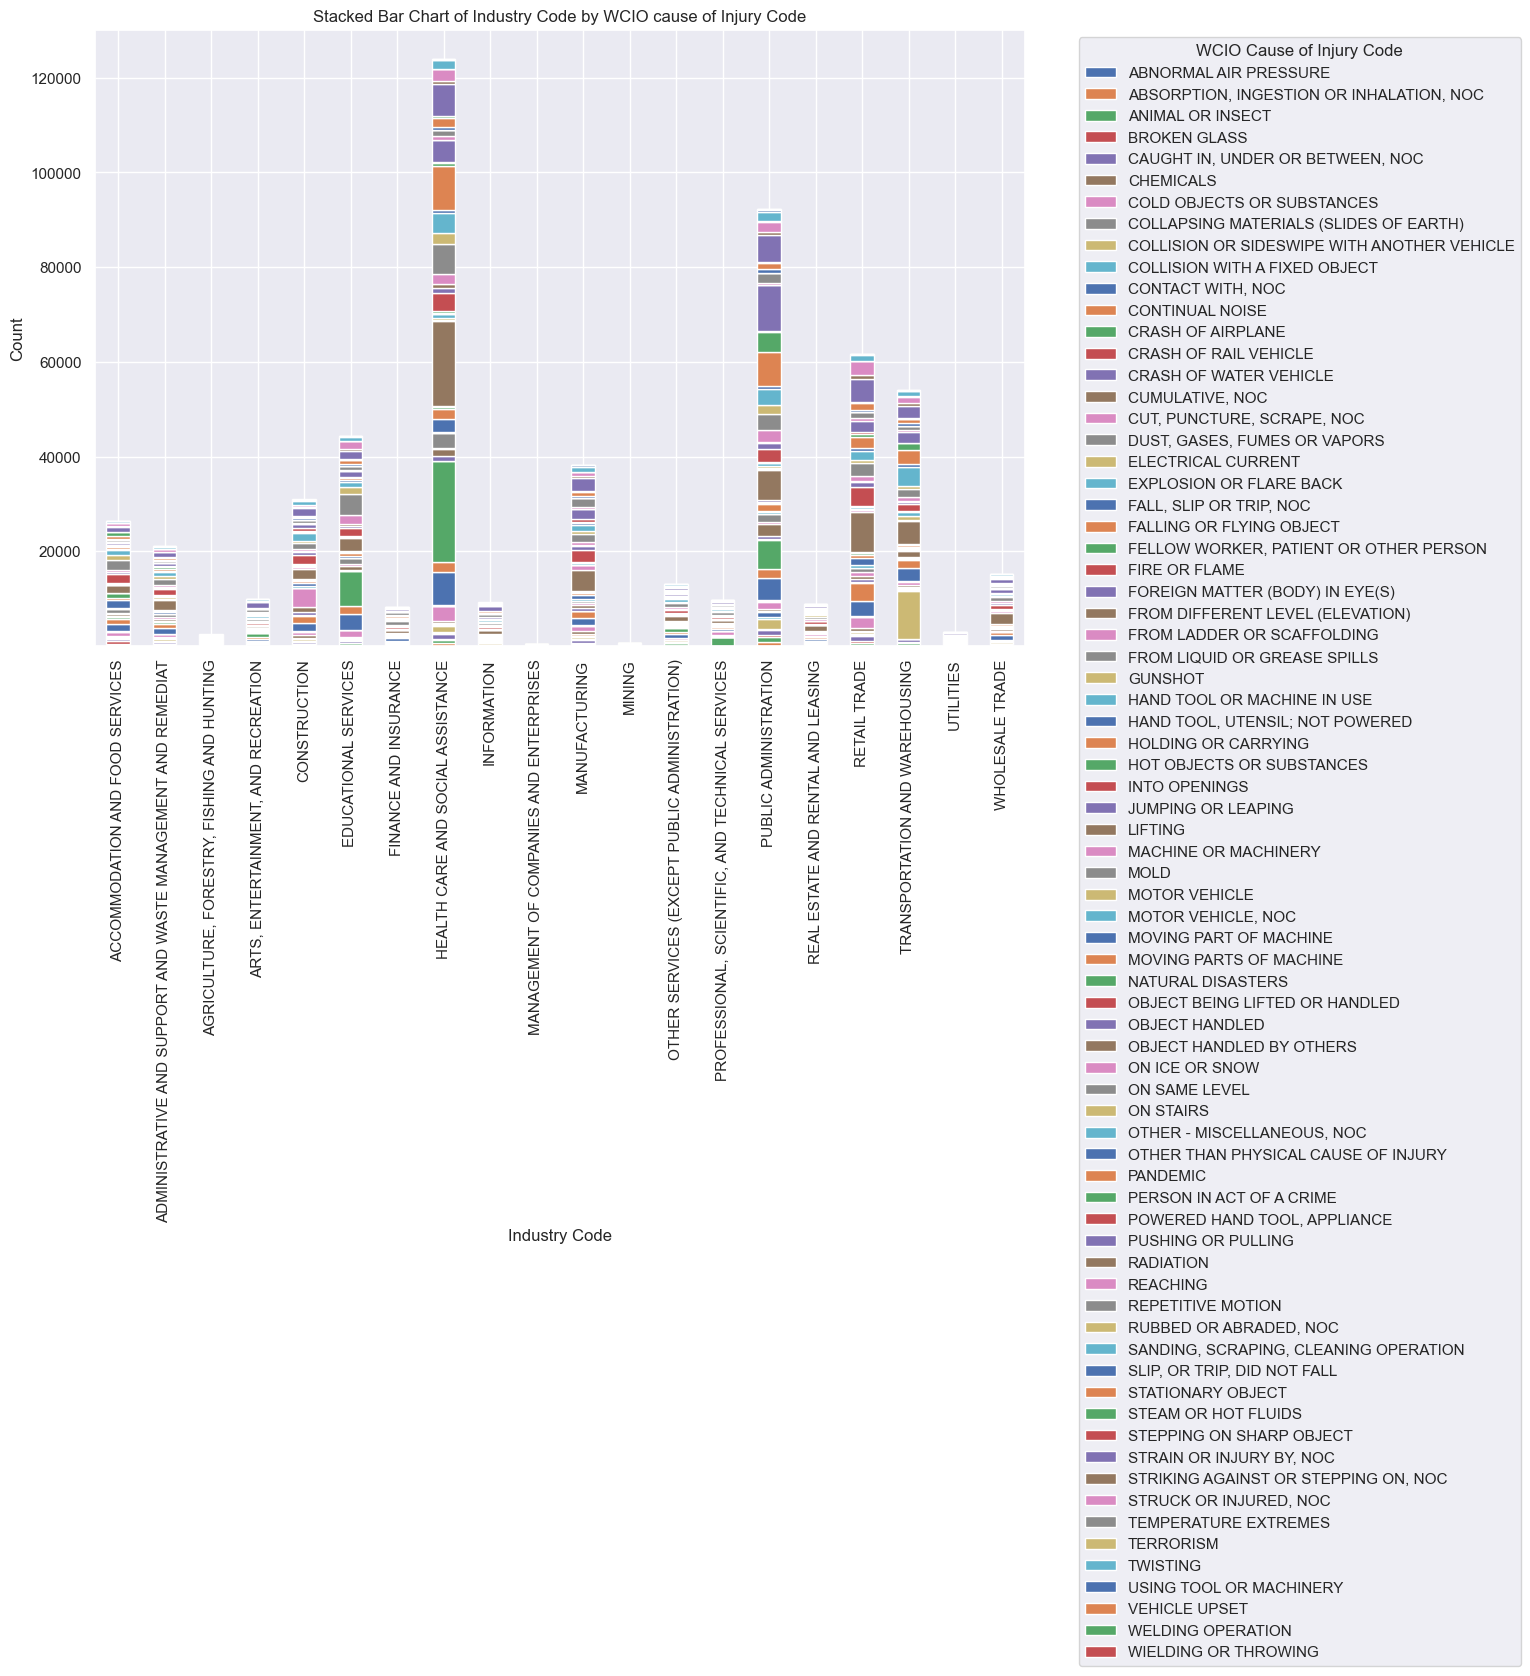

In [82]:

#We can notice that depending on the industry code we will have different mode for WCIO cause of Injury Code which is logivcal since the accidents in some
#industries are different 

import seaborn as sns
import matplotlib.pyplot as plt
# Create a contingency table
contingency_table = pd.crosstab(train_data_copy['Industry Code Description'],train_data_copy['WCIO Cause of Injury Description'])

# Create a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Stacked Bar Chart of Industry Code by WCIO cause of Injury Code")
plt.xlabel("Industry Code")
plt.ylabel("Count")
plt.legend(title="WCIO Cause of Injury Code", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [85]:
#Here I filled the missing values in the Cause of Injury code with the modes of WCIO Cause of Injury Code that i get through grouping data by industry
# Step 1: Create mapping for the mode of cause of injury codes
mode_mapping_industry = train_data_copy.groupby('Industry Code')['WCIO Cause of Injury Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Fill missing cause of injury codes
train_data_copy['WCIO Cause of Injury Code'] = train_data_copy['WCIO Cause of Injury Code'].fillna(train_data_copy['Industry Code'].map(mode_mapping_industry))

# Step 3: Create mapping for the mode of cause of injury descriptions
mode_mapping_nature = train_data_copy.groupby('WCIO Cause of Injury Code')['WCIO Cause of Injury Description'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 4: Fill missing cause of injury descriptions based on the mapping
train_data_copy['WCIO Cause of Injury Description'] = train_data_copy['WCIO Cause of Injury Description'].fillna(train_data_copy['WCIO Cause of Injury Code'].map(mode_mapping_nature))

#Step 5 in case there are still missing values:
if train_data_copy["WCIO Cause of Injury Code"].isna().any() and train_data_copy["WCIO Cause of Injury Description"].isna().any():
    mode_value = train_data_copy["WCIO Cause of Injury Code"].mode()[0]
    mode_value2 = train_data_copy["WCIO Cause of Injury Description"].mode()[0]
    train_data_copy["WCIO Cause of Injury Code"] = train_data_copy["WCIO Cause of Injury Code"].fillna(mode_value)
    train_data_copy["WCIO Cause of Injury Description"] = train_data_copy["WCIO Cause of Injury Description"].fillna(mode_value2)

### 6- Filling Nature of Injury

In [87]:
#Here I filled the missing values in the nature of injury code with the modes of WCIO nature of Injury Code that i get through grouping data by  'WCIO Cause of Injury Code'
# I thought about this because first it makes sense and second there's a slight correlation of 0.17 still minimal but considering
#we had the heat map before data preprocessing maybe after this work we will have high  in correlation


# Step 1: Create mapping for the mode of cause of injury codes based on the nature of injury code
mode_mapping_cause_code = train_data_copy.groupby('WCIO Cause of Injury Code')['WCIO Nature of Injury Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Create mapping for the mode of cause of injury descriptions based on the nature of injury code
mode_mapping_cause_description = train_data_copy.groupby('WCIO Cause of Injury Code')['WCIO Nature of Injury Description'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 3: Fill missing cause of injury codes based on the mapping
train_data_copy['WCIO Nature of Injury Code'] = train_data_copy['WCIO Nature of Injury Code'].fillna(train_data_copy['WCIO Cause of Injury Code'].map(mode_mapping_cause_code))

# Step 4: Fill missing cause of injury descriptions based on the mapping
train_data_copy['WCIO Nature of Injury Description'] = train_data_copy['WCIO Nature of Injury Description'].fillna(train_data_copy['WCIO Cause of Injury Code'].map(mode_mapping_cause_description))

# Step 5: Check for missing values after filling
missing_counts_after = train_data_copy[['WCIO Cause of Injury Code', 
                                         'WCIO Nature of Injury Code', 
                                         'WCIO Nature of Injury Description']].isna().sum()
print(missing_counts_after)


WCIO Cause of Injury Code            0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
dtype: int64


### 7- Filling Body Part

In [88]:
#Here I filled the missing values in the part of body code with the modes of WCIO Part Of Body Code that i get through grouping data by 'WCIO Nature of Injury Code'
# I thought about this because first it makes sense and second there's a slight correlation of 0.23 still minimal but considering
#we had the heat map before data preprocessing maybe after this work we will have high  in correlation


# Step 1: Create mapping for the mode of cause of injury codes based on the nature of injury code
mode_mapping_cause_code = train_data_copy.groupby('WCIO Nature of Injury Code')['WCIO Part Of Body Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Create mapping for the mode of cause of injury descriptions based on the nature of injury code
mode_mapping_cause_description = train_data_copy.groupby('WCIO Nature of Injury Code')['WCIO Part Of Body Description'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 3: Fill missing cause of injury codes based on the mapping
train_data_copy['WCIO Part Of Body Code'] = train_data_copy['WCIO Part Of Body Code'].fillna(train_data_copy['WCIO Nature of Injury Code'].map(mode_mapping_cause_code))

# Step 4: Fill missing cause of injury descriptions based on the mapping
train_data_copy['WCIO Part Of Body Description'] = train_data_copy['WCIO Part Of Body Description'].fillna(train_data_copy['WCIO Nature of Injury Code'].map(mode_mapping_cause_description))

# Step 5: Check for missing values after filling
missing_counts_after = train_data_copy[['WCIO Nature of Injury Code', 
                                         'WCIO Part Of Body Code', 
                                         'WCIO Part Of Body Description']].isna().sum()
print(missing_counts_after)


WCIO Nature of Injury Code       0
WCIO Part Of Body Code           0
WCIO Part Of Body Description    0
dtype: int64


In [89]:
train_data_copy.isna().sum()


AccidentID                                 0
Accident Date                           3689
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    28651
Birth Year                             29078
C-2 Date                               14560
C-3 Date                              386781
Carrier Name                               0
Carrier Type                               0
Claim Identifier                           0
Claim Injury Type                          0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    423228
Gender                                     0
IME-4 Count                           441223
Industry Code                           9958
Industry Code Description               9958
Medical Fe

### 8- Dealing with missing data for industry code

In [61]:
#Since we noticed some pattern between WCIO nature of injury and industry we filled missing value industries with
#modes of industry grouped by WCIO nature of Injury

#Calculate the mode for 'Industry code' for each unique value in 'WCIO NATURE OF INJURY'
# Step 1: Create mapping for the mode of cause of injury codes based on the nature of injury code
mode_mapping_cause_code = train_data_copy.groupby('WCIO Cause of Injury Code')['Industry Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Create mapping for the mode of cause of injury descriptions based on the nature of injury code
mode_mapping_cause_description = train_data_copy.groupby('WCIO Cause of Injury Code')['Industry Code Description'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 3: Fill missing cause of injury codes based on the mapping
train_data_copy['Industry Code'] = train_data_copy['Industry Code'].fillna(train_data_copy['WCIO Cause of Injury Code'].map(mode_mapping_cause_code))

# Step 4: Fill missing cause of injury descriptions based on the mapping
train_data_copy['Industry Code Description'] = train_data_copy['Industry Code Description'].fillna(train_data_copy['WCIO Cause of Injury Code'].map(mode_mapping_cause_description))

# Step 5: Check for missing values after filling
missing_counts_after = train_data_copy[['WCIO Cause of Injury Code', 
                                         'Industry Code', 
                                         'Industry Code Description']].isna().sum()
print(missing_counts_after)


WCIO Cause of Injury Code    0
Industry Code                0
Industry Code Description    0
dtype: int64


In [62]:
train_data_copy.isna().sum()

AccidentID                                0
Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                                0
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441223
Industry Code                             0
Industry Code Description                 0
Medical Fee Region              

### 9- Filling Average Weekly Wage

In [63]:
# We are dealing with workers and most of the data in this field is 0 which doesn't make sense that's why I will consider them as nan

In [64]:
train_data_copy['Average Weekly Wage'].replace(0, np.nan, inplace=True) 

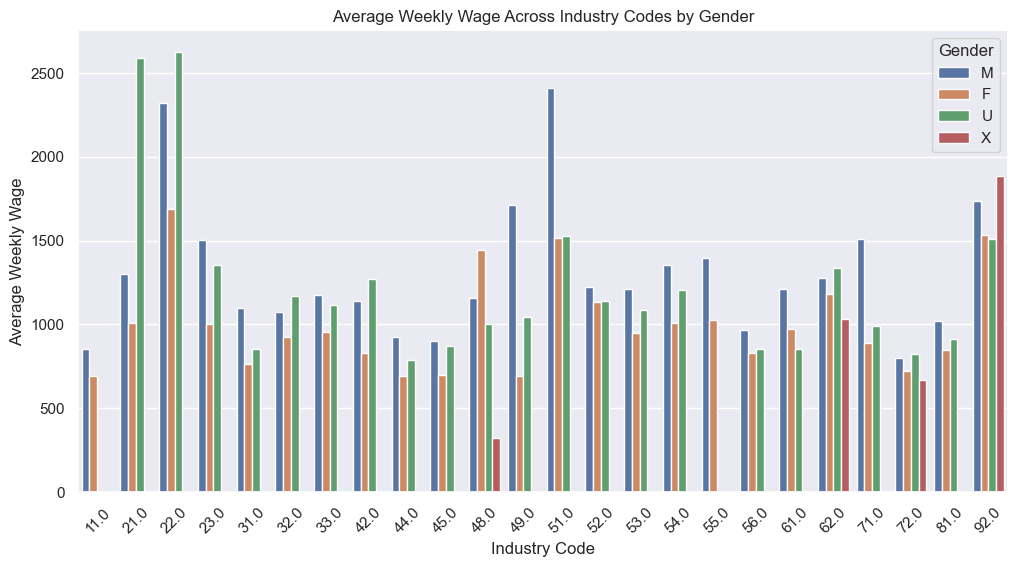

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(data=train_data_copy, x='Industry Code', y='Average Weekly Wage', hue='Gender', ci=None)

# Adding titles and labels
plt.title('Average Weekly Wage Across Industry Codes by Gender')
plt.xlabel('Industry Code')
plt.ylabel('Average Weekly Wage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')  # Add legend for gender
plt.show()
#There's clearly a relationship of the variables that constitutes the identity of the worker and his salary

In [75]:
# Fill missing values in 'average_weekly_wage' using the median (not sensible for outliers) within each 'age' and 'sex' group
#I thought about this because age and gender are personal information that logically can affect the wage

train_data_copy['Average Weekly Wage'] = train_data_copy.groupby(['Gender','Industry Code'])['Average Weekly Wage'].transform(lambda x: x.fillna(x.median()))
#This part is in case we still have missing values
if train_data_copy['Average Weekly Wage'].isna().any():
    wage_median=train_data_copy['Average Weekly Wage'].median
    train_data_copy["Average Weekly Wage"] = train_data_copy["Average Weekly Wage"].fillna(wage_median)

In [76]:
train_data_copy.isna().sum()

AccidentID                                0
Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                       0
Birth Year                                0
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                               0
Industry Code                             0
Industry Code Description                 0
Medical Fee Region              

### 10 -Fill IM-4 Count, I replaced nan by 0

In [71]:
train_data_copy["IME-4 Count"] = train_data_copy["IME-4 Count"].replace(np.nan,0)

### 11- For C-2 Date and C-3 Date in my opinion we should maybe leave them as nan since they may not have been filled by the employer or employee in the first place
### Date of the first hearing was held, 
A blank date means the claim has not yet had a hearing
we can create from this variable a boolean variable
### IM-4 Count, I replaced nan by 0
### For ZIP code I didn't know how to deal with it.

# Outliers

In [ ]:

Age at Injury
Avg Weekly Wage
Birth Year
IME 4 Count

# Feature Engineering

In [72]:
#Feature engineering 
train_data_copy['First Hearing Held'] = train_data_copy['First Hearing Date'].notna().astype(int)

# Optionally, check the updated DataFrame
print(train_data_copy[['First Hearing Date', 'First Hearing Held']].head())

  First Hearing Date  First Hearing Held
0                NaT                   0
1         2020-02-21                   1
2                NaT                   0
4                NaT                   0
5                NaT                   0
